<a href="https://colab.research.google.com/github/ina-tantri/Cluster-Repo/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
#display daya
data_cluster = pd.read_csv("DataCoba.csv")
data_cluster.head(15)

,Provinsi,Kabupaten/Kota,Jenis Ikan,Volume Produksi,Nilai Produksi,Konsumsi
0,ACEH,ACEH BARAT,BANDENG,462.630,7.107000e+07,1169
1,ACEH,ACEH BARAT,CAKALANG,1120.950,9.603827e+08,0
2,ACEH,ACEH BARAT,KAKAP,1250.740,6.805815e+09,0
3,ACEH,ACEH BARAT,KEMBUNG,1370.749,3.260189e+10,3589
4,ACEH,ACEH BARAT,KERANG,186.610,1.306270e+09,0
5,ACEH,ACEH BARAT,KUWE,1455.186,4.111474e+09,0
6,ACEH,ACEH BARAT,LAYANG,1170.932,4.214000e+08,0
7,ACEH,ACEH BARAT,LAYUR,891.718,1.105766e+10,0
8,ACEH,ACEH BARAT,LELE,57.280,1.432000e+09,0
9,ACEH,ACEH BARAT,MAS,11.880,4.158000e+08,0


In [ ]:
#memberikan pembobotan untuk membagi data konsumsi dan produksi menjadi 3 bagian
#mencari nilai minimal dan max konsumsi dan produksi lalu membaginya menjadi 3
range_prod = (data_cluster['Volume Produksi'].max() - data_cluster['Volume Produksi'].min())/3
lower_prod = data_cluster['Volume Produksi'].min() + range
middle_prod = lower_prod + range_prod
upper_prod = middle_prod + range_prod

category = data_cluster(data_cluster['Volume Produksi'], bins = [data_cluster['Volume Produksi'].min(), lower_prod, middle_prod, upper_prod],
    labels = [1, 2, 3])
data_cluster.insert(6, 'Kategori Prod', category)


TypeError: ignored

In [ ]:
## Load Data
data_cluster = data_cluster[['Volume Produksi','Konsumsi']]
print('Total Row : ', len(data_cluster))
## Feature Scaling
sc_data_cluster = StandardScaler()
data_cluster_std = sc_data_cluster.fit_transform(data_cluster.astype(float))

Total Row :  12110


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


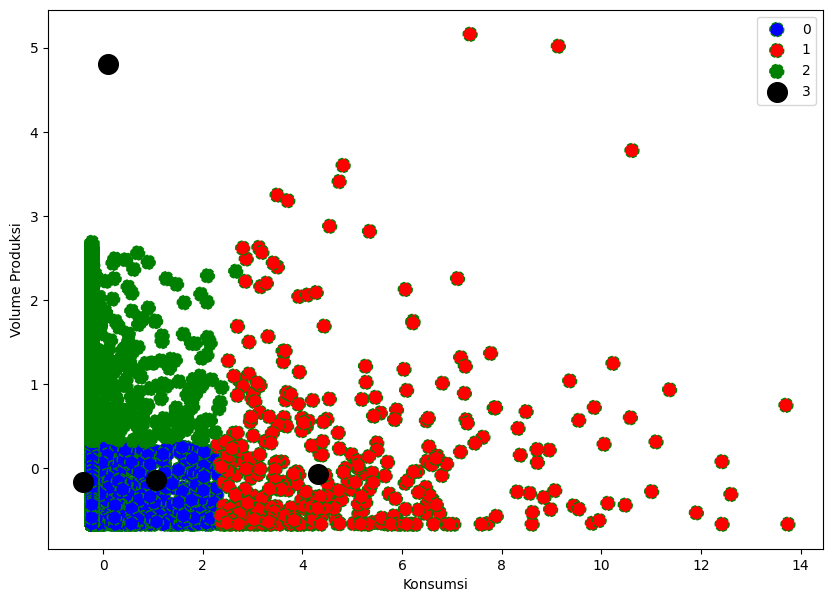

In [ ]:
## Clustering with KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(data_cluster_std)
labels = kmeans.labels_
new_data_cluster = pd.DataFrame(data = data_cluster_std, columns = ['Volume Produksi','Konsumsi'])
new_data_cluster['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(new_data_cluster["Konsumsi"][new_data_cluster["label_kmeans"] == 0], new_data_cluster["Volume Produksi"][new_data_cluster["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_data_cluster["Konsumsi"][new_data_cluster["label_kmeans"] == 1], new_data_cluster["Volume Produksi"][new_data_cluster["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_data_cluster["Konsumsi"][new_data_cluster["label_kmeans"] == 2], new_data_cluster["Volume Produksi"][new_data_cluster["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
legend_drawn_flag = True
plt.legend(["0", "1", "2", "3"], loc=1, frameon=legend_drawn_flag)
ax.set_xlabel('Konsumsi')
ax.set_ylabel('Volume Produksi')
plt.show()

In [ ]:
#add labels to a new column

ikan = pd.read_csv("Fake_data.csv")
ikan['Cluster'] = labels
ikan.head()


,Kabupaten/Kota,Volume Produksi,Nama Ikan,Konsumsi,Provinsi,Cluster
0,Jembrana,0.014,Bandeng,0.039,Bali,1
1,Tabanan,0.477,Bandeng,0.532,Bali,1
2,Badung,1.050,Bandeng,0.925,Bali,3
3,Gianyar,1.289,Bandeng,0.294,Bali,0
4,Klungkung,0.786,Bandeng,0.324,Bali,0


***Data Frame Manipulation***

In [ ]:

#create a list of conditions
condition = [
    (ikan['Cluster'] == 0),
    (ikan['Cluster'] == 1),
    (ikan['Cluster'] == 2),
    (ikan['Cluster'] == 3)
]

#create values
values = ['Kurang disarankan untuk ditangkap/dibudidaya', 
          'Bisa ditangkap/dibudidaya', 
          'Sangat disarankan untuk ditangkap/dibudidaya', 
          'Bisa ditangkap/dibudidaya' ]
ikan['Status'] = np.select(condition, values)

#sort custom
urutan = [
    (ikan['Status'] == 'Sangat disarankan untuk ditangkap/dibudidaya'),
    (ikan['Status'] == 'Bisa ditangkap/dibudidaya'),
    (ikan['Status'] == 'Kurang disarankan untuk ditangkap/dibudidaya')
]
values = [1, 2, 3]
ikan['temp'] = np.select(urutan, values)
ikan = ikan.sort_values(by = ['temp'])


#display
ikan.head()

,Kabupaten/Kota,Volume Produksi,Nama Ikan,Konsumsi,Provinsi,Cluster,Status,temp
1334,Karimun,0.484,Tuna,1.192,Kepulauan Riau,2,Sangat disarankan untuk ditangkap/dibudidaya,1
1254,Belitung Timur,0.287,Cakalang,0.955,Kepulauan Bangka Belitung,2,Sangat disarankan untuk ditangkap/dibudidaya,1
1263,Bangka,0.832,Tuna,0.814,Kepulauan Bangka Belitung,2,Sangat disarankan untuk ditangkap/dibudidaya,1
1272,Kepulauan Anambas,0.172,Bandeng,1.264,Kepulauan Riau,2,Sangat disarankan untuk ditangkap/dibudidaya,1
1279,Kepulauan Anambas,0.818,Patin,0.777,Kepulauan Riau,2,Sangat disarankan untuk ditangkap/dibudidaya,1


**Take one Region**

In [ ]:
#ambil satu

namakab = str(input('Masukkan nama Kabupaten atau Kota: '))
ikan_new = ikan.loc[ikan['Kabupaten/Kota'] == namakab]
outputkab = ikan_new[['Kabupaten/Kota', 'Nama Ikan', 'Status']].copy()

#display
outputkab.head(10)

Masukkan nama Kabupaten atau Kota: Bandung


,Kabupaten/Kota,Nama Ikan,Status
656,Bandung,Tongkol,Sangat disarankan untuk ditangkap/dibudidaya
494,Bandung,Ikan Mas,Sangat disarankan untuk ditangkap/dibudidaya
467,Bandung,Patin,Sangat disarankan untuk ditangkap/dibudidaya
683,Bandung,Tuna,Bisa ditangkap/dibudidaya
440,Bandung,Bandeng,Bisa ditangkap/dibudidaya
629,Bandung,Cakalang,Bisa ditangkap/dibudidaya
521,Bandung,Kakap,Bisa ditangkap/dibudidaya
602,Bandung,Nila,Bisa ditangkap/dibudidaya
548,Bandung,Udang,Bisa ditangkap/dibudidaya
575,Bandung,Lele,Kurang disarankan untuk ditangkap/dibudidaya
